In [19]:
# import libraries
import pandas as pd
import numpy as np
import os
import random as rd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

### StatQuest Example

In [ ]:
genes = ['gene'+ str(i) for i in range (1,101)]

wt = ['wt'+str(i)for i in range(1,6)]
ko = ['ko'+str(i)for i in range(1,6)]
data = pd.DataFrame(columns = [*wt,*ko], index = genes)

for gene in data.index:
  data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
  data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

print(data.head())
print(data.shape)


       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3   ko4  ko5
gene1  236  248  273  282  244  995  885  924  1007  887
gene2  807  763  795  785  804   98   86   88    91   88
gene3  383  384  370  370  384  336  309  304   341  296
gene4  916  892  911  904  861   84   88   81    89   97
gene5   35   35   39   46   48  316  282  278   309  296
(100, 10)


In [ ]:
scaled_data = preprocessing.scale(data.T)

In [ ]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+ str(x) for x in range(1, len(per_var)+1)]

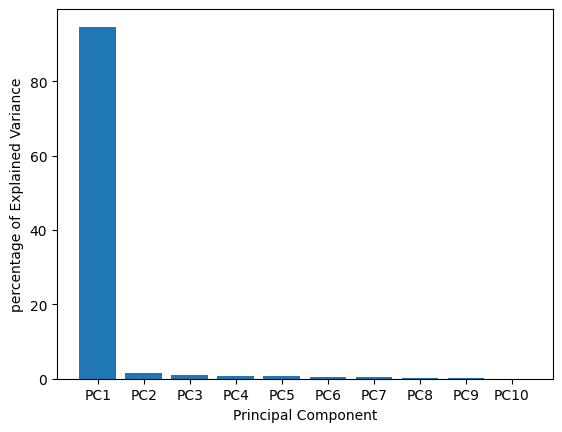

In [ ]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

Text(0, 0.5, 'PC2 - 1.6%')

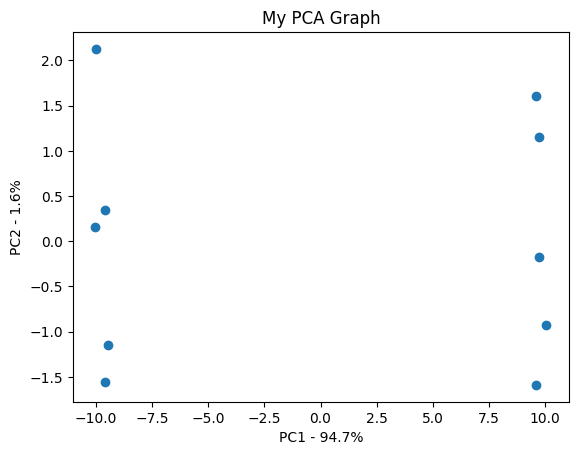

In [ ]:
pca_df = pd.DataFrame(pca_data,index=[*wt, *ko], columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

### PCA on an image

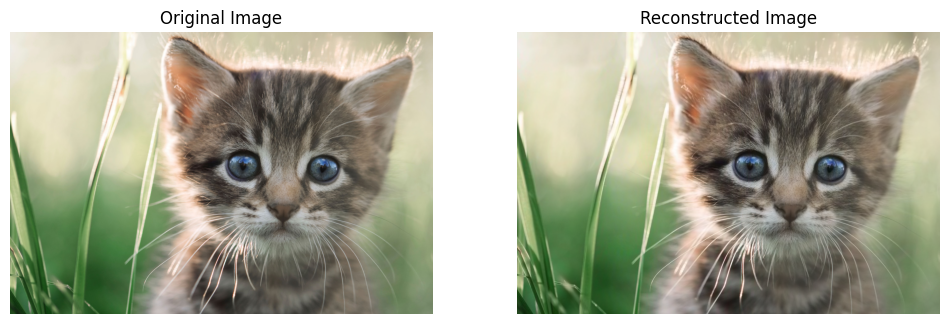

In [50]:
# Load the image
image = io.imread('/content/cat.jpg')

# Convert the image to YCbCr color space
ycbcr_image = color.rgb2ycbcr(image)

# Separate the Y, Cb, and Cr channels
y_channel = ycbcr_image[:, :, 0]
cb_channel = ycbcr_image[:, :, 1]
cr_channel = ycbcr_image[:, :, 2]

# Function to apply PCA on a channel
def apply_pca(channel, n_components):
    original_shape = channel.shape
    channel_flat = channel.reshape(original_shape[0], -1)
    pca = PCA(n_components=n_components)
    channel_pca = pca.fit_transform(channel_flat)
    reconstructed_channel = pca.inverse_transform(channel_pca)
    return reconstructed_channel.reshape(original_shape)

# Number of components for PCA
n_components = 20

# Apply PCA to the Cb and Cr channels
cb_reconstructed = apply_pca(cb_channel, n_components)
cr_reconstructed = apply_pca(cr_channel, n_components)

# Stack the reconstructed channels with the original Y channel
reconstructed_ycbcr = np.stack((y_channel, cb_reconstructed, cr_reconstructed), axis=2)

# Convert the reconstructed image back to RGB color space
reconstructed_image = color.ycbcr2rgb(reconstructed_ycbcr)

# Clip values to be in the valid range [0, 1] for RGB
reconstructed_image = np.clip(reconstructed_image, 0, 1)

# Plot the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(reconstructed_image)
ax[1].set_title(f'Reconstructed Image')
ax[1].axis('off')

plt.show()


### Face Dataset commponent analysis

In [37]:
from skimage import io, color
import cv2

images = []
for filename in os.listdir("/content/"):
  if filename.endswith(".jpg"):
    img = io.imread(os.path.join("/content/", filename))
    #change into grayscale
    img_gray = color.rgb2gray(img)
    # Resize the image
    img_resized = cv2.resize(img_gray, (200, 200))
    # Flatten the image to a 1D array
    img_flattened = img_resized.flatten()
    images.append(img_flattened)

X = np.array(images)
print(f'Shape of X: {X.shape}')

Shape of X: (15, 40000)


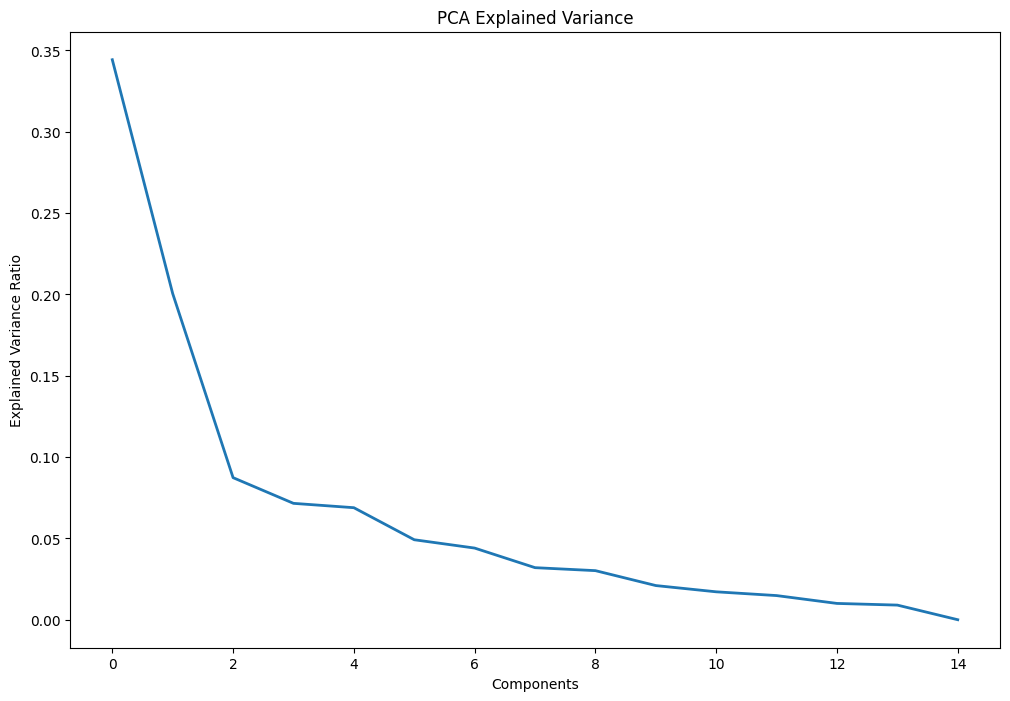

In [38]:
# Apply PCA
pca = PCA()
pca.fit(X)

# Plot the explained variance
plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

Text(0.5, 1.0, 'Average Face with 3 Components')

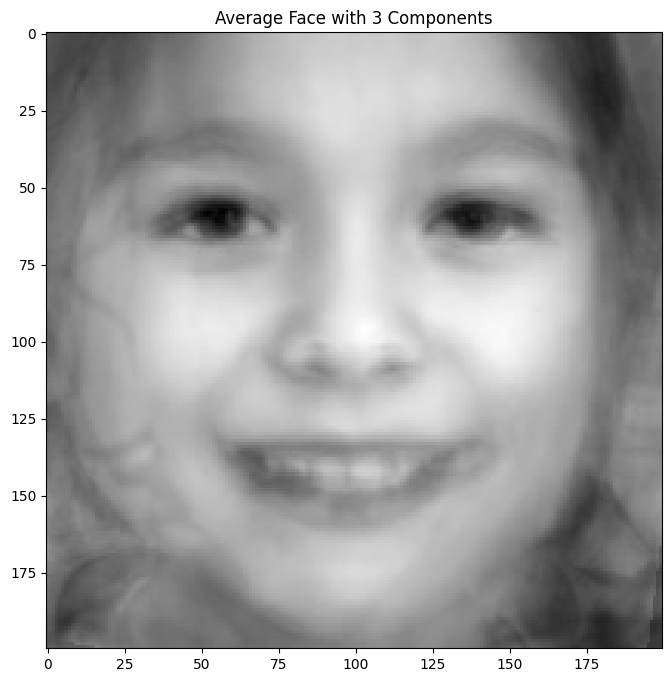

In [49]:
n_components = 4

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)

# Plot the average face
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((200, 200)), cmap="gray")
ax.set_title('Average Face with 3 Components')
